In [22]:
%matplotlib inline


# HomeWork 6
### Alvaro Bueno

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).

Let's analyze them using projection.

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

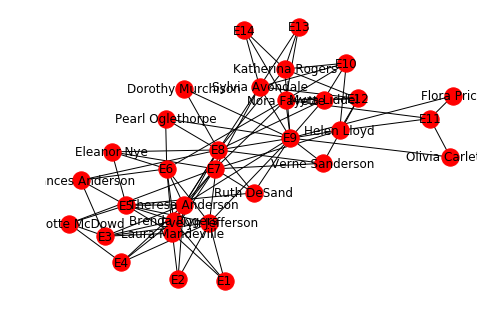

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

#import data
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project graph using women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph using the weighted method
# counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

# project graph using clubs nodes
C = bipartite.projected_graph(G, clubs)
print('')
print("#Members, Club Name")
for c in clubs:
    print('%d %s' % (C.degree(c), c))

# use weighted method
# will count the number of shared members
C = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#shared members, Club Name")
for c in clubs:
    print('%d %s' % (C.degree(c, weight='weight'), c))    
pos=nx.spring_layout(G)
nx.draw(G,with_labels=True)
plt.show()

In [20]:
nx.betweenness_centrality(W)


{'Brenda Rogers': 0.00267379679144385,
 'Charlotte McDowd': 0.0,
 'Dorothy Murchison': 0.005347593582887701,
 'Eleanor Nye': 0.00267379679144385,
 'Evelyn Jefferson': 0.010122230710466005,
 'Flora Price': 0.0,
 'Frances Anderson': 0.00267379679144385,
 'Helen Lloyd': 0.010122230710466005,
 'Katherina Rogers': 0.005347593582887701,
 'Laura Mandeville': 0.00267379679144385,
 'Myra Liddel': 0.005347593582887701,
 'Nora Fayette': 0.010122230710466005,
 'Olivia Carleton': 0.0,
 'Pearl Oglethorpe': 0.005347593582887701,
 'Ruth DeSand': 0.010122230710466005,
 'Sylvia Avondale': 0.010122230710466005,
 'Theresa Anderson': 0.010122230710466005,
 'Verne Sanderson': 0.010122230710466005}

In [21]:
nx.eigenvector_centrality(C)

{'E1': 0.23225108153055324,
 'E10': 0.23225108153055318,
 'E11': 0.23225108153055318,
 'E12': 0.23225108153055318,
 'E13': 0.23225108153055318,
 'E14': 0.23225108153055318,
 'E2': 0.23225108153055324,
 'E3': 0.23225108153055324,
 'E4': 0.23225108153055318,
 'E5': 0.23225108153055318,
 'E6': 0.3393355092231299,
 'E7': 0.3393355092231299,
 'E8': 0.3393355092231299,
 'E9': 0.3393355092231299}

## Conclusions

The most popular people In Davis at that time were Evelyn Jefferson, Laura Mandeville and Theresa Anderson, as they both appear at the top of both listings.
Same with E6, E7, E8, E9 which were the most popular events in the season. This also corroborates different centrality 


![original davis dataset](davis.png "Davis Dataset")

According to the original dataset with the dates above, most of the popular events happen between april and october, they might be season based.